In [6]:
!python3 -m pip install wurlitzer
from qlens_helper import *
from qlens import *
%load_ext wurlitzer
from wurlitzer import pipes
q = QLens()

q.sci_notation = False
q.ansi_output = False
q.imgdata_read("alphafit.dat")
q.imgdata_display()
q.add_lens(Alpha({"b": 4.5, "alpha": 1, "s": 0.0, "q": 0.8, "theta": 30, "xc": 0.7, "yc": 0.3}))
q.lens[0].setvary([1,0,0,1,1,1,1])
q.add_lens(Shear({"shear": 0.02, "theta": 10, "xc": 0.7, "yc": 0.3}))
q.lens[1].anchor_center(0)
q.lens[1].setvary([1,1])

q.central_image = False
q.imgplane_chisq = True
q.flux_chisq = True
q.chisqtol = 1e-6
q.set_sourcepts_auto()
q.nrepeat = 2
print("Fit model:")
#with pipes() as (out, err):
q.fitmodel()
#print(q.lens)
#q.fit_chisq()
#from wurlitzer import pipes

#with pipes() as (out, err):
q.run_fit("simplex")
    
#print(out.read())


The wurlitzer extension is already loaded. To reload it, use:
  %reload_ext wurlitzer
Fit model:
Source 0: zsrc=2
#        pos_x(arcsec)	pos_y(arcsec)	sig_pos		flux		sig_flux	time_delay(days)	sigma_t
Image 0: 1.521659	5.876290	0.010000	4.068833	0.100000	0.000000		0.100000
Image 1: -4.134645	0.917436	0.010000	-5.408835	0.100000	2.703787		0.100000
Image 2: -3.266677	-3.328404	0.010000	5.706037	0.100000	1.978578		0.100000
Image 3: 4.502836	-1.401077	0.010000	-2.259707	0.100000	7.216227		0.100000

0. alpha(z=0.5): b=4.5, alpha=1, s=0, q=0.8, theta=30 degrees, xc=0.7, yc=0.3
   parameters: b, q, theta, xc, yc
1. shear(z=0.5): shear=0.02, theta_shear=10 degrees, xc=0.7, yc=0.3 (center_anchored to lens 0)
   parameters: shear, theta_shear

Initial fit coordinates for source points:
Source point 0: (0.292869,0.289392)

Initial stepsizes: 0.45 0.1 20 0.45 0.45 0.03 20 0.274949 0.274949 

# images: 4 vs. 4 data, chisq_pos=1.01875e+06, chisq_flux=2568.15, 2*loglike=1.02132e+06                
# i

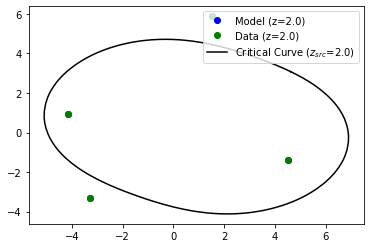

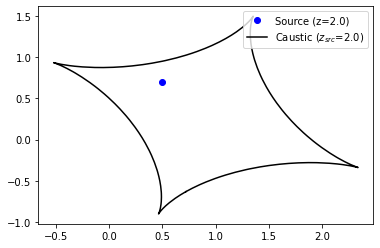

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

In [7]:
q.use_bestfit()
fit_plotimg(q)